In [1]:
#모듈 호출
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#로그
print("모듈 호출이 완료되었습니다.")

모듈 호출이 완료되었습니다.


In [2]:
#실행때마다 동일한 결과를 얻기 위해 랜덤 시드 지정 & 텐서플로 연산을 결정적으로 하기
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [3]:
#패션 MNIST
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

In [4]:
#형식 출력
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


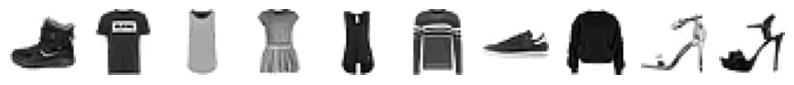

In [5]:
#입력과 타깃 샘플
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [6]:
#타깃
print([train_target[i] for i in range(10)])
print(np.unique(train_target, return_counts=True))

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [7]:
#로지스틱 회귀
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
#1-데이터 준비
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)
#2-학습 및 채점 결과 얻기
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

(60000, 784)
0.81945


In [8]:
#케라스 모델 만들기
from tensorflow import keras

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

#이 코드는 단지 마지막 출력층을 정의하는 코드
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model = keras.Sequential([dense])

#a모델 성정
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(train_target[:10])

(48000, 784) (48000,)
(12000, 784) (12000,)
[7 3 5 8 6 9 3 3 9 9]


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#모델 훈련
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 782us/step - accuracy: 0.7377 - loss: 0.7834
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.8346 - loss: 0.4845
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - accuracy: 0.8452 - loss: 0.4565
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.8504 - loss: 0.4424
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.8537 - loss: 0.4337


In [10]:
#채점
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.8462 - loss: 0.4365


[0.4444445073604584, 0.8458333611488342]

In [11]:
#심층 신경망
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(100, activation='softmax')

model = keras.Sequential([dense1, dense2])

In [12]:
#모델 신경망 요약
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,600 (346.09 KB)

 Trainable params: 88,600 (346.09 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#층을 추가하는 다른 방법
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)),
    keras.layers.Dense(100, activation='softmax')], '패션 MNIST 모델')

In [14]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(100, activation='softmax'))

In [15]:
#모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7259 - loss: 0.9517
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8465 - loss: 0.4288
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8593 - loss: 0.3890
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8669 - loss: 0.3645
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8736 - loss: 0.3457


In [16]:
#채점
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.8698 - loss: 0.3602


[0.3634969890117645, 0.8657500147819519]

In [17]:
#렐루 함수와 Flatten 층
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) #2차원 배열 사용시에도, 문제가 없게 해주는 코드
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='softmax'))

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
#모델 신경망 요약
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,600 (346.09 KB)

 Trainable params: 88,600 (346.09 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#데이터 다시 준비(Flatter함수에 맞추기)
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [20]:
#모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7541 - loss: 0.7595
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8466 - loss: 0.4243
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8649 - loss: 0.3721
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8753 - loss: 0.3448
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8820 - loss: 0.3257


In [21]:
#채점
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8651 - loss: 0.3863


[0.38889041543006897, 0.8634166717529297]

In [22]:
#옵티마이저
#기존 모델은 확률적 경사 하강법을 사용한다
#옵티마이저로 어떻게 학습할지 선택할 수 있다
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
sgd = keras.optimizers.SGD(learning_rate=0.1)
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [25]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) #2차원 배열 사용시에도, 문제가 없게 해주는 코드
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='softmax'))

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7527 - loss: 0.7936
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8505 - loss: 0.4243
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8637 - loss: 0.3768
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8749 - loss: 0.3454
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8837 - loss: 0.3229


In [29]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8674 - loss: 0.3649


[0.3687306344509125, 0.8653333187103271]

In [30]:
#모델 정의하는 함수
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [31]:
#손실 곡선
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target,epochs=5, verbose=0)
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


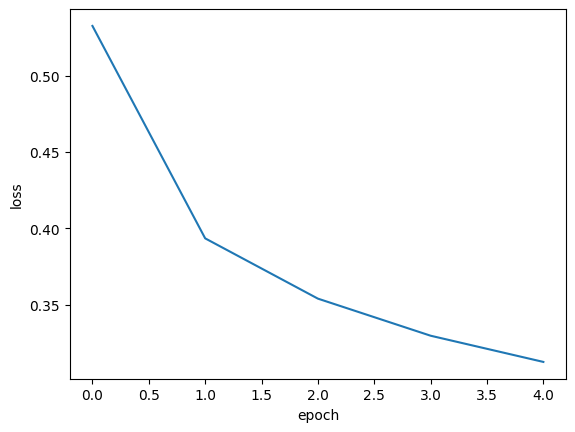

In [32]:
#손실 곡선 그리기
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

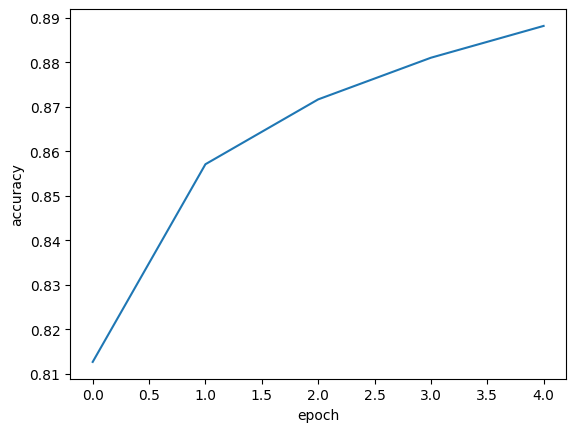

In [33]:
#모델의 정확도 그래프
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [34]:
#더 많은 에포크 - 너무 훈련 세트에 비중이 치우침 >> 골디락스 지점을 찾아야 함
history = model.fit(train_scaled, train_target,epochs=20, verbose=0)

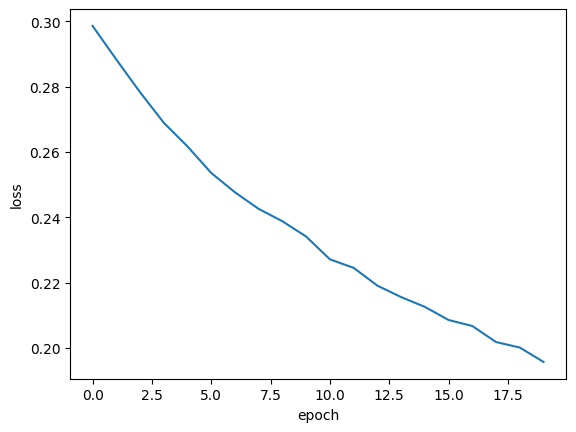

In [35]:
#손실 곡선 그리기
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [36]:
#검증 세트에 대한 손실이 줄어드는지 파악해보기
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target,epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


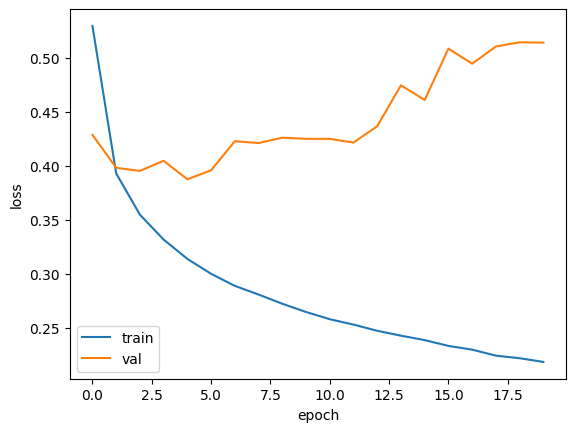

In [37]:
#손실 곡선 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [38]:
#드롭아웃 - 은닉층의 뉴런 하나를 임의로 꺼서 훈련 세트에 과대적합 되는 것을 막기, 즉 한 뉴런에 너무 의존하지 않도록 하는 것
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target,epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

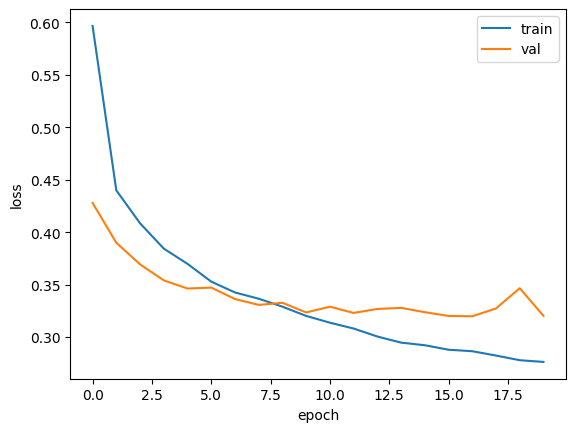

In [40]:
#손실 곡선 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [41]:
#모델 저장과 복원을 위한 모델 생성
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target,epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [42]:
#모델 저장과 복원
model.save('model-whole.keras') #모델 전체 저장
model.save_weights('model.weights.h5') #모델 파라미터만 저장

In [43]:
#복원
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model.weights.h5')

In [44]:
val_labels = np.argmax(model.predict(val_scaled), axis=1)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step
0.8820833333333333


In [45]:
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.8826 - loss: 0.3213


[0.3250400722026825, 0.8820833563804626]

In [46]:
#콜백
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
model.fit(train_scaled, train_target,epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [47]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.8847 - loss: 0.3201


[0.32253503799438477, 0.8866666555404663]

In [48]:
#조기 종료
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target,epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [49]:
print(early_stopping_cb.stopped_epoch)

14


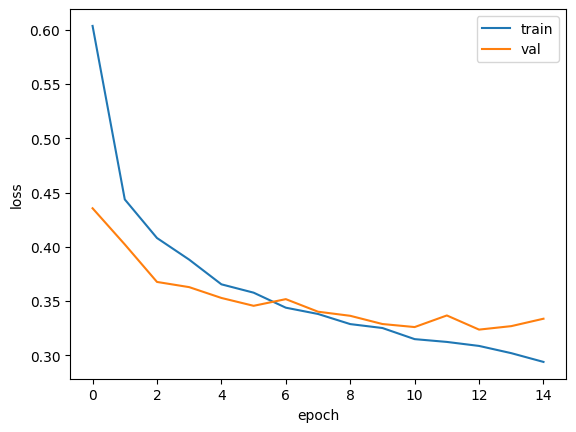

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [55]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8826 - loss: 0.3239


[0.32369789481163025, 0.8829166889190674]